In [9]:
#importing libraries and the data frame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV


#Loading the dataset and cleaning it
data = pd.read_csv(r'D://tree_addhealth.csv')
data_clean = data.dropna()




In [10]:
#selecting predictor variables and target variable as seperate data sets
predvars= data_clean[['HISPANIC','WHITE','NAMERICAN','ASIAN','age','ALCEVR1','ALCPROBS1','ESTEEM1','EXPEL1','PARPRES','SCHCONN1','DEVIANT1','VIOL1','PARACTV']]

target = data_clean.FAMCONCT


In [11]:
#Standarize the predictors to have a mean equal to 0 and a standard deviation equal to 1, this will put them on the same scale in order to have a fair penalty

#include a copy of the data frame

predictors=predvars.copy()

#import the preprocessing library from sklearn

from sklearn import preprocessing

predictors['HISPANIC']=preprocessing.scale(predictors['HISPANIC'].astype('float64'))
predictors['WHITE']=preprocessing.scale(predictors['WHITE'].astype('float64'))
predictors['NAMERICAN']=preprocessing.scale(predictors['NAMERICAN'].astype('float64'))
predictors['ASIAN']=preprocessing.scale(predictors['ASIAN'].astype('float64'))
predictors['age']=preprocessing.scale(predictors['age'].astype('float64'))
predictors['ALCEVR1']=preprocessing.scale(predictors['ALCEVR1'].astype('float64'))
predictors['ALCPROBS1']=preprocessing.scale(predictors['ALCPROBS1'].astype('float64'))
predictors['VIOL1']=preprocessing.scale(predictors['VIOL1'].astype('float64'))
predictors['DEVIANT1']=preprocessing.scale(predictors['DEVIANT1'].astype('float64'))
predictors['EXPEL1']=preprocessing.scale(predictors['EXPEL1'].astype('float64'))
predictors['ESTEEM1']=preprocessing.scale(predictors['ESTEEM1'].astype('float64'))
predictors['SCHCONN1']=preprocessing.scale(predictors['SCHCONN1'].astype('float64'))
predictors['PARPRES']=preprocessing.scale(predictors['PARPRES'].astype('float64'))
predictors['PARACTV']=preprocessing.scale(predictors['PARACTV'].astype('float64'))


In [12]:
#split the data into training and test dataset
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target,  test_size=.3, random_state=123)

In [13]:
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)
# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

{'HISPANIC': 0.0,
 'WHITE': 0.04544366782820781,
 'NAMERICAN': 0.022230066594991,
 'ASIAN': -0.014339056919418277,
 'age': -0.12218997097180191,
 'ALCEVR1': -0.07283950764274441,
 'ALCPROBS1': 0.0,
 'ESTEEM1': 0.7627799930200759,
 'EXPEL1': 0.0041336239561872825,
 'PARPRES': 0.47801171312957036,
 'SCHCONN1': 0.28958307559627705,
 'DEVIANT1': -0.39844838663151244,
 'VIOL1': 0.05696742351722811,
 'PARACTV': 0.4668860135079612}

Text(0.5,1,'Regression Coefficients Progression for Lasso Paths')

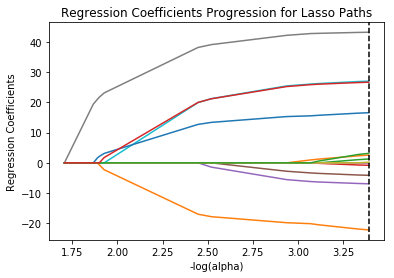

In [14]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_),linestyle='--',  color='k',label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)


Text(0.5,1,'Mean squared error on each fold')

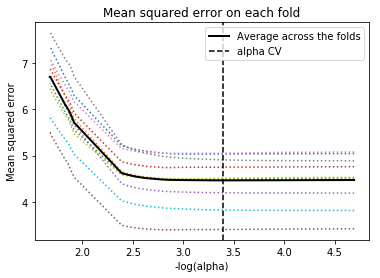

In [15]:
#plot the mean squared error on each fold

m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_),linestyle='--',  color='k',label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [16]:
#Print the mean squared error for training and test data

from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
4.426932265347937
test data MSE
4.957523905674367


## Interpretation

### This plots show the change in the mean squared error while the change in the penalty parameter at each step of the selection process It decreases rapidly at first and then stabilize at point where adding more predictors to the model wouldn’t decrease the mean squared error. 
### The first plot shows the relative importance of the predictor selected at any step of the selection process. During the estimation process, the deviant behavior have the largest regression coefficient meaning that it’s most strongly negatively associated with the family connection. While the self esteem and parents presence were positively associated with family connection of the adolescent . 
### Other predictors associated with greater family connection included school connection while age and alcohol use are negatively associated with the family connection of the person .